In [245]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [246]:
# cudaが使えるか確認
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [247]:
prm_data_path = '../data storage/prm_data_L16_FCNN_Nh3.pth'

In [248]:
prm = torch.load('../data storage/prm_data_L16_FCNN_Nh3.pth')
prm

OrderedDict([('fc1.weight',
              tensor([[-2.2547e-02,  4.5893e-02,  6.3555e-02, -9.7094e-02,  8.4649e-02,
                        1.2921e-02,  3.4246e-02, -1.4250e-02, -1.6909e-03,  4.7092e-02,
                        5.5993e-03, -4.1262e-02, -6.4637e-03, -3.8132e-02,  2.1435e-02,
                       -3.1043e-02,  5.2139e-02, -1.4895e-02,  3.8501e-03, -7.7305e-03,
                        1.3099e-02,  5.0865e-02,  4.3506e-02, -8.0341e-02,  2.0019e-02,
                       -5.0114e-02, -1.9358e-02,  1.5054e-03, -2.0102e-02, -7.9532e-02,
                        6.4505e-02, -2.9270e-02,  4.6203e-02, -3.7700e-02, -1.4286e-01,
                       -9.7709e-02,  1.5844e-02, -4.2009e-02,  9.4284e-02,  7.2160e-02,
                       -4.8195e-02,  3.8470e-02,  6.1020e-04,  4.9383e-03,  5.1550e-02,
                       -1.5268e-02, -2.9825e-02, -2.5343e-02, -2.9816e-02, -4.4837e-03,
                        1.9822e-02,  5.1869e-02,  2.1824e-02,  8.0574e-02, -3.8225e-02,
    

In [249]:
fc2_weight = prm['fc2.weight']
fc2_weight

tensor([[  2.2889, -17.0279, -17.2941],
        [  1.9216, -15.6444, -15.7586],
        [  1.9748, -15.8924, -16.2657],
        [  1.2747, -12.8005, -13.0581],
        [  0.0817, -11.3487, -11.9283],
        [  1.3092,  -9.3234, -10.0535],
        [  0.0585,  -6.7206,  -7.7373],
        [  1.7212,  -2.0076,  -2.4785],
        [ -1.4290,   0.8897,   0.8540],
        [ -8.8561,  -1.3331,   0.0365],
        [-11.9511,   0.3097,  -0.4121],
        [-13.0754,  -0.4152,   1.9782],
        [-14.6074,   1.5486,  -0.7424],
        [-15.0683,   1.5263,  -1.4377],
        [-16.4039,   1.4044,   0.5200],
        [-16.4913,  -0.1684,   1.9457],
        [-17.1409,   1.3305,   1.8640],
        [-17.2202,   1.9836,   0.8105],
        [-17.1674,   1.4706,   1.9419],
        [-17.4987,   1.2813,   1.0025]], device='cuda:0')

In [250]:
fc2_weight.size()

torch.Size([20, 3])

In [251]:
# NumPy配列に変換
fc2_weight_np = fc2_weight.cpu().numpy()
# データを転置して
fc2_weight_np_square = fc2_weight_np.T

In [252]:
fc2_weight_np_square

array([[  2.288923  ,   1.9215945 ,   1.9747813 ,   1.2747003 ,
          0.08168586,   1.3091725 ,   0.05854656,   1.7212186 ,
         -1.4289969 ,  -8.856146  , -11.951088  , -13.075356  ,
        -14.607414  , -15.068275  , -16.40391   , -16.491264  ,
        -17.1409    , -17.22022   , -17.167385  , -17.498714  ],
       [-17.027891  , -15.644389  , -15.892385  , -12.800462  ,
        -11.348717  ,  -9.323444  ,  -6.7206244 ,  -2.0076284 ,
          0.8897433 ,  -1.3330666 ,   0.3097188 ,  -0.41519222,
          1.5485724 ,   1.5262629 ,   1.4044363 ,  -0.16842078,
          1.3305218 ,   1.9835782 ,   1.4705782 ,   1.281272  ],
       [-17.294123  , -15.7585535 , -16.26572   , -13.058088  ,
        -11.928278  , -10.053492  ,  -7.7372613 ,  -2.4785082 ,
          0.85401964,   0.03646689,  -0.41209203,   1.9781997 ,
         -0.7424289 ,  -1.4377129 ,   0.52000374,   1.9456598 ,
          1.8640319 ,   0.8104644 ,   1.9418893 ,   1.0025054 ]],
      dtype=float32)

In [253]:
fc2_weight_np_square.shape

(3, 20)

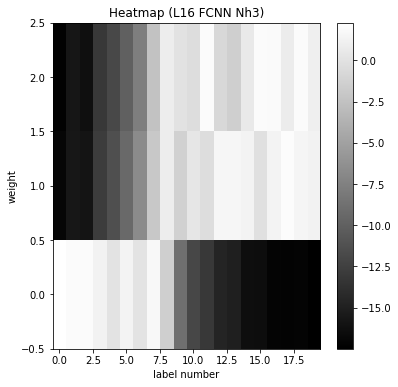

In [254]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc2_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 FCNN Nh3)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_wight.png')
plt.show()

In [255]:
fc2_weight_np_square_sum = np.sum(fc2_weight_np_square, axis=0)
fc2_weight_np_square_sum

array([-32.03309   , -29.481348  , -30.183323  , -24.58385   ,
       -23.195309  , -18.067764  , -14.39934   ,  -2.764918  ,
         0.31476605, -10.152746  , -12.053461  , -11.512348  ,
       -13.8012705 , -14.979725  , -14.47947   , -14.7140255 ,
       -13.946346  , -14.426178  , -13.754917  , -15.214936  ],
      dtype=float32)

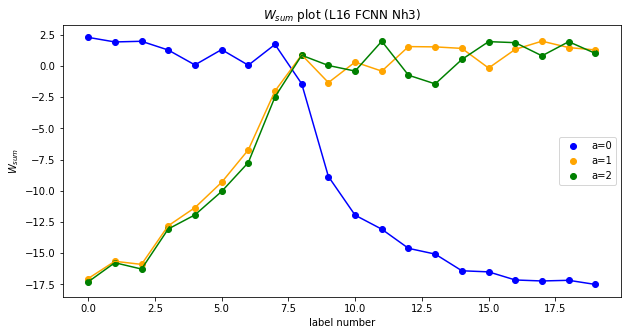

In [256]:
import numpy as np
import matplotlib.pyplot as plt

# データ
x = np.arange(len(fc2_weight_np_square[1]))
y0 = fc2_weight_np_square[0]
y1 = fc2_weight_np_square[1]
y2 = fc2_weight_np_square[2]

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')
plt.plot(x, y0, color='blue')
plt.plot(x, y1, color='orange')
plt.plot(x, y2, color='green')
plt.title('$W_{sum}$ plot (L16 FCNN Nh3)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_weight_plot.png')
plt.legend()  # 凡例を表示
plt.show()

第1層の出力と磁化の相関図を作成

In [257]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [258]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [259]:
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16_v2.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [260]:
# # 磁化を計算
# def magnetization(state):
#     return np.mean(state)

# for i in range(len(spin_data)):
#     mag = magnetization(spin_data[i])
#     if mag > 0:
#         spin_data[i] *= -1

In [261]:
spin_data[0].shape

(16, 16)

In [262]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]
flat_spin_data[0].shape

(256,)

In [263]:
fc1_weight = prm['fc1.weight'].cpu().numpy()
len(fc1_weight)


3

In [264]:
fc1_bias = prm['fc1.bias'].cpu().numpy()
fc1_bias

array([ 3.407496 , -2.8633387, -3.0793073], dtype=float32)

In [265]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [266]:
len(output_data_0)

40000

In [267]:
len(mag_data)

40000

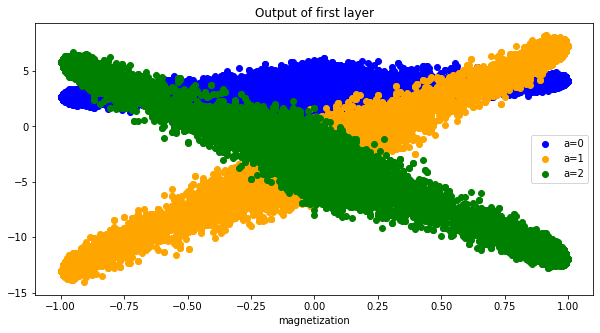

In [268]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()

学習済みモデルからプロットするver

In [269]:
import torch.nn as nn
import torch.nn.functional as F

class FCNN2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FCNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, output_size, bias=True)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        return x

In [270]:
# cudaが使えるか確認
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [271]:
input_size = 16*16
hidden_size = 3
output_size = 20
model = FCNN2(input_size, hidden_size, output_size).to(device)

model.load_state_dict(torch.load(prm_data_path), strict=False)
print(model.state_dict())

OrderedDict([('fc1.weight', tensor([[-2.2547e-02,  4.5893e-02,  6.3555e-02, -9.7094e-02,  8.4649e-02,
          1.2921e-02,  3.4246e-02, -1.4250e-02, -1.6909e-03,  4.7092e-02,
          5.5993e-03, -4.1262e-02, -6.4637e-03, -3.8132e-02,  2.1435e-02,
         -3.1043e-02,  5.2139e-02, -1.4895e-02,  3.8501e-03, -7.7305e-03,
          1.3099e-02,  5.0865e-02,  4.3506e-02, -8.0341e-02,  2.0019e-02,
         -5.0114e-02, -1.9358e-02,  1.5054e-03, -2.0102e-02, -7.9532e-02,
          6.4505e-02, -2.9270e-02,  4.6203e-02, -3.7700e-02, -1.4286e-01,
         -9.7709e-02,  1.5844e-02, -4.2009e-02,  9.4284e-02,  7.2160e-02,
         -4.8195e-02,  3.8470e-02,  6.1020e-04,  4.9383e-03,  5.1550e-02,
         -1.5268e-02, -2.9825e-02, -2.5343e-02, -2.9816e-02, -4.4837e-03,
          1.9822e-02,  5.1869e-02,  2.1824e-02,  8.0574e-02, -3.8225e-02,
         -8.8608e-02, -6.0677e-02, -4.8942e-03,  7.2201e-03,  2.7801e-02,
         -1.5187e-02, -9.8415e-03, -5.7235e-02, -5.5235e-02,  6.6759e-02,
         -

In [272]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [273]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)
        
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [274]:
# NumPy ndarrayをPyTorch Tensorに変換
spin_data_tensor = [torch.from_numpy(i).type(torch.float32) for i in spin_data]
spin_data_tensor[0].size()

torch.Size([16, 16])

In [275]:
output = [np.squeeze(model(spin_data_tensor[i]).detach().numpy()) for i in range(len(spin_data_tensor))]

In [276]:
a = torch.squeeze(model(spin_data_tensor[1]))
b = [a[i].detach().numpy() for i in range(3)]
b[0]

array([-1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1.], dtype=float32)

In [277]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]

In [278]:
fc0_weight = model.state_dict()['fc1.weight'].cpu().numpy()
fc0_bias = model.state_dict()['fc1.bias'].cpu().numpy()

In [279]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [280]:
output_data_0

[4.17183698433837,
 4.198835393932313,
 2.6825425959304994,
 3.144697359699421,
 3.7046726307362405,
 3.9114189619085664,
 1.8882173057299951,
 3.5559819250720466,
 2.5775384133794432,
 4.165368437103098,
 1.9140644202652766,
 2.576698609138475,
 2.9484172027387103,
 1.9484480506162072,
 4.279380452504483,
 4.816425184346372,
 2.602796933171703,
 3.3227120346036827,
 2.8478447323195724,
 4.308476820728174,
 3.140064322093167,
 3.828319202473722,
 2.5013267105732666,
 2.7834557199439587,
 3.3040815602053044,
 4.005970302567221,
 1.7896601124321023,
 3.1530426517183514,
 3.1726976015725086,
 2.795037671987302,
 4.236234152345787,
 4.6647035949517885,
 4.068126243631923,
 3.5313529187642416,
 3.1392716586942697,
 4.408755050773834,
 3.0391745993456425,
 2.064619961887729,
 4.482871080626865,
 3.815110532706967,
 1.4492514841895172,
 2.2051587519472378,
 2.9428934937513986,
 4.050722694310025,
 3.8225393164848356,
 3.6098175407150848,
 4.245587191975574,
 3.4096077967496967,
 3.59550787852

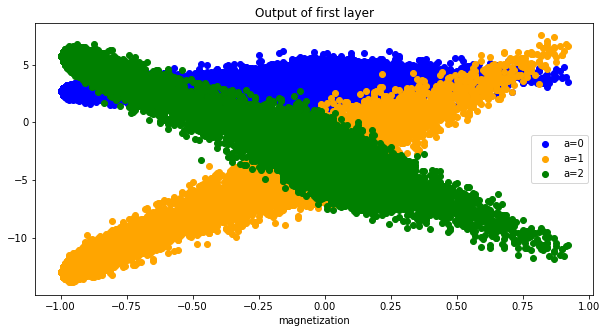

In [281]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
plt.savefig('../image/L16_CNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()